# Classificação usando Keras

Vamos usar novamente o MNIST como dataset para a nossa tarefa


*The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.*


## Import Keras and Packages


In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [3]:
import matplotlib.pyplot as plt

In [4]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

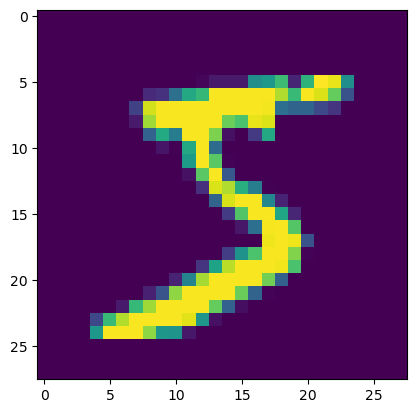

In [6]:
plt.imshow(X_train[0])

- Como não estamos trabalhando com CNN, o dado precisa estar estrturado em uma única linha.

Vamos fazer uma mudança nos dado (FLATTEN)

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]  # width x height

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

- Normalização dos valores dos pixels [0, 1]

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

- TARGET

Para a tarefa de classificação com mais de 2 classes, é preciso traformar o dado em múltiplas colunas  (one-hot-encode), para isso, temos a função *to_categorical* do *Keras Utilities package*.


In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


<a id='item322'></a>


## Build a Neural Network


In [10]:
def classification_model():
    
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

<a id='item332'></a>


## Treinamento


In [11]:

model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10


2023-09-19 18:54:49.246041: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-09-19 18:54:49.251477: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394315000 Hz
2023-09-19 18:54:49.252278: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562a33d29a30 executing computations on platform Host. Devices:
2023-09-19 18:54:49.252332: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-09-19 18:54:49.351016: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

 - 60s - loss: 0.1832 - acc: 0.9455 - val_loss: 0.0934 - val_acc: 0.9708
Epoch 2/10
 - 59s - loss: 0.0773 - acc: 0.9759 - val_loss: 0.0744 - val_acc: 0.9765
Epoch 3/10
 - 58s - loss: 0.0547 - acc: 0.9827 - val_loss: 0.0829 - val_acc: 0.9745
Epoch 4/10
 - 59s - loss: 0.0391 - acc: 0.9872 - val_loss: 0.0646 - val_acc: 0.9812
Epoch 5/10
 - 58s - loss: 0.0321 - acc: 0.9893 - val_loss: 0.0797 - val_acc: 0.9782
Epoch 6/10
 - 57s - loss: 0.0256 - acc: 0.9917 - val_loss: 0.0965 - val_acc: 0.9772
Epoch 7/10
 - 58s - loss: 0.0232 - acc: 0.9923 - val_loss: 0.0941 - val_acc: 0.9772
Epoch 8/10
 - 58s - loss: 0.0191 - acc: 0.9939 - val_loss: 0.0847 - val_acc: 0.9795
Epoch 9/10
 - 59s - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0983 - val_acc: 0.9784
Epoch 10/10
 - 59s - loss: 0.0160 - acc: 0.9949 - val_loss: 0.0958 - val_acc: 0.9794


## Teste

In [12]:

# avaliar o modelo com os dados de teste
scores = model.evaluate(X_test, y_test, verbose=0)

In [14]:
print('Accuracy: {}% \n Error: {}'.format(100*scores[1], 1 - scores[1]))        

Accuracy: 97.94% 
 Error: 0.02059999999999995


## Salvar o modelo

In [15]:
model.save('classification_model.h5')

# Carregar o modelo


In [ ]:
from keras.models import load_model

In [ ]:
pretrained_model = load_model('classification_model.h5')